In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [23]:
data_df=pd.read_csv('../creditcard.csv')
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [25]:
null_columns=pd.DataFrame({'Columns':data_df.isna().sum().index,'No. Null values':data_df.isna().sum().values,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [26]:
null_columns

,Columns,No. Null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [27]:
nfCount=0
notFraud=data_df['Class']
for i in range(len(notFraud)):
    if notFraud[i]==0:
        nfCount=nfCount+1
per_nf=(nfCount/len(notFraud))*100
print("percentage of total not fraud transaction in dataset",per_nf)

percentage of total not fraud transaction in dataset 99.82725143693798


In [28]:
fCount=0
fraud=data_df['Class']
for i in range(len(fraud)):
    if fraud[i]==1:
        fCount=fCount+1
per_f=(fCount/len(fraud))*100
print("percentage of total fraud transaction in dataset",per_f)

percentage of total fraud transaction in dataset 0.1727485630620034


In [29]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=fraud
plot_data['Genuine Transaction']=notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


<AxesSubplot: title={'center': 'Bar plot for Fraud VS Genuine transactions'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

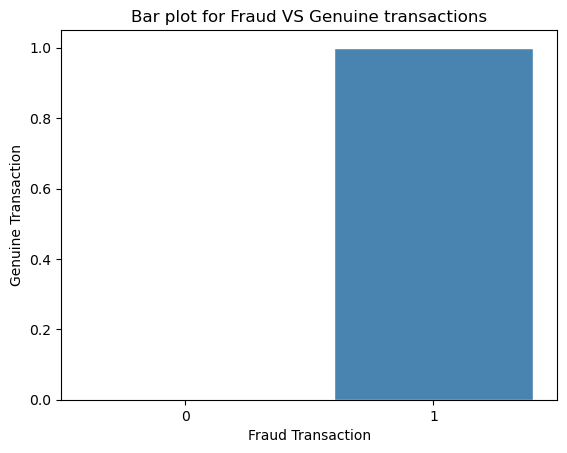

In [30]:
plt.title("Bar plot for Fraud VS Genuine transactions")
sns.barplot(x = 'Fraud Transaction', y = 'Genuine Transaction', data = plot_data, palette = 'Blues', edgecolor = 'w')

Text(0, 0.5, 'Time')

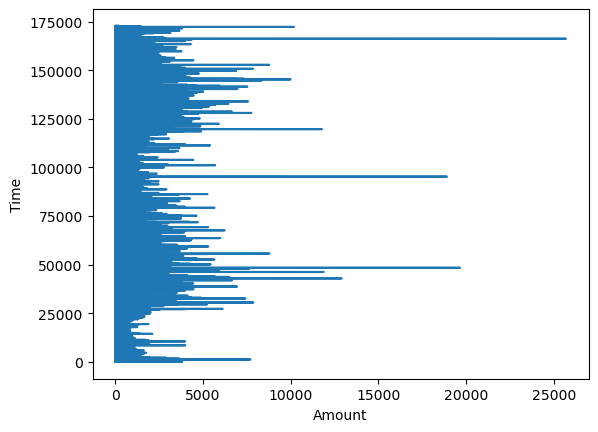

In [31]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x,y)
plt.xlabel("Amount")
plt.ylabel("Time")

/tmp/ipykernel_1709/487515289.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_df["Amount"],color="red")


<AxesSubplot: xlabel='Amount', ylabel='Density'>

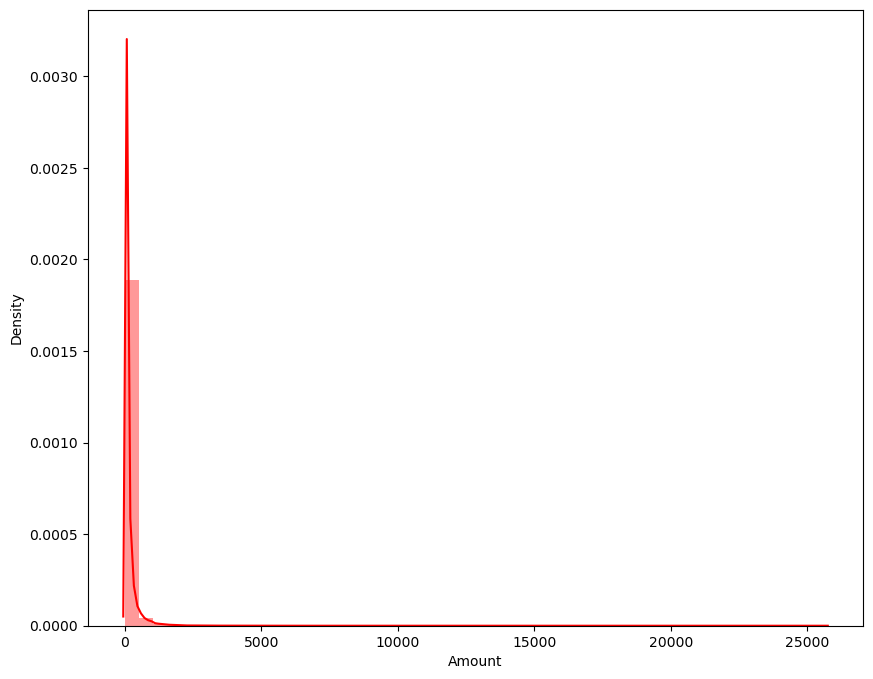

In [32]:
plt.figure(figsize=(10,8), )
# plt.title('Amount Distribution')

sns.distplot(data_df["Amount"],color="red")

The `.drop` method in `pandas` is used to remove specified labels (rows or columns) from a DataFrame in this case `Class` column removed and other are stored.<br>
`y` is used to represent the target variable or the dependent variable.<br>
`x` is used to represent the features or independent variables, which are used to predict or explain the target variable.

In [33]:
x=data_df.drop(['Class'],axis=1)
y=data_df['Class']
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
# xTrain.shape
xTest.shape

(56962, 30)

In [35]:
logisticReg=LogisticRegression()
logisticReg.fit(xTrain,yTrain)

/home/animesh/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
y_pred=logisticReg.predict(xTest)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

accuracy=(TP+TN)/(TP+TN+FP+FN)

In [37]:
accuracy=logisticReg.score(xTrain,yTrain)
accuracy

0.9989993197129627

In [38]:
cm=metrics.confusion_matrix(yTest,y_pred)
cm

array([[56844,    20],
       [   48,    50]])

Text(58.222222222222214, 0.5, 'Actual value')

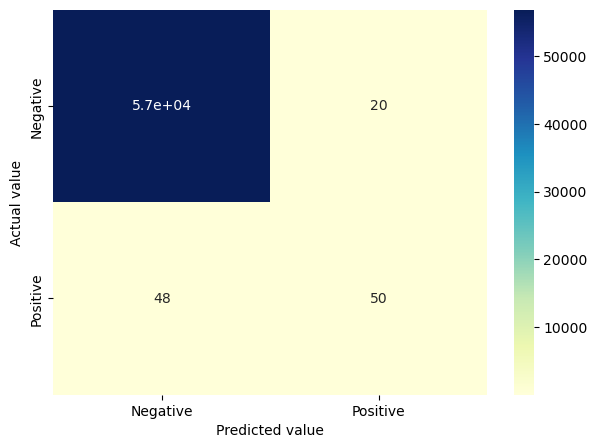

In [39]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,cmap='YlGnBu',xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel('Predicted value')
plt.ylabel('Actual value')

In [40]:
xTest.shape

(56962, 30)

In [41]:
data_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Observing in action using new data set.<br>
It is working fine but it is not accurate.Although we see the accuracy is 99.98% this because of uneven distribution of data. In this data set fraud transaction is very low as compare to genuine transaction thats why it will not work properly although accuracy is high.[Details](https://www.kaggle.com/code/franciscosantos2/is-99-accuracy-good-maybe-not-credit-card-fraud)<br>
To fix this issue we need to distribute data [properly](https://www.kaggle.com/code/mryadav/credit-card-fraud-detection)<br>


In [42]:
new_data=pd.read_csv('../new.csv')
new_pred=logisticReg.predict(new_data)
new_pred

array([0, 0, 0, 0, 1])